# About


In [16]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Get dataframe of model information
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,mamba,kernel_regression,mamba_toy,,-1,-1,20,4,NaN,mamba_toy
1,nanogpt,kernel_regression,nanogpt_kernel_regression,,-1,-1,5,6,4.0,nanogpt_kernel_regression


In [23]:
#task = "linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"
task = "kernel_regression"

# run_id = "nanogpt"  # if you train more models, replace with the run_id from the table above
run_id = "mamba"

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Figure 1: Context Window Size vs. Squared Error

nanogpt_kernel_regression nanogpt


100%|██████████| 1/1 [00:00<?, ?it/s]

metrics:  {'standard': {'nanogpt_embd=128_layer=6_head=4': {'mean': [56.78610610961914, 38.08021545410156, 36.815303802490234, 32.137142181396484, 24.298892974853516, 21.30345916748047, 24.90691375732422, 34.15388488769531, 45.91779708862305, 32.48512649536133, 48.64834213256836, 28.015438079833984, 42.92825698852539, 56.6335334777832, 38.094730377197266, 35.28976821899414, 36.38200759887695, 33.12948989868164, 28.199520111083984, 22.648685455322266, 50.13938903808594, 48.794681549072266, 56.86947250366211, 27.359899520874023, 17.314029693603516, 22.4083309173584, 40.95117950439453, 53.575740814208984, 27.74837303161621, 31.83932876586914, 38.37543869018555, 38.269622802734375, 29.878284454345703, 28.476364135742188, 30.430213928222656, 24.81851577758789, 30.899734497070312, 19.785186767578125, 85.29523468017578, 40.67074203491211], 'std': [224.92132568359375, 129.16668701171875, 135.91278076171875, 89.6683578491211, 99.25238037109375, 61.052955627441406, 96.04458618164062, 166.2180633

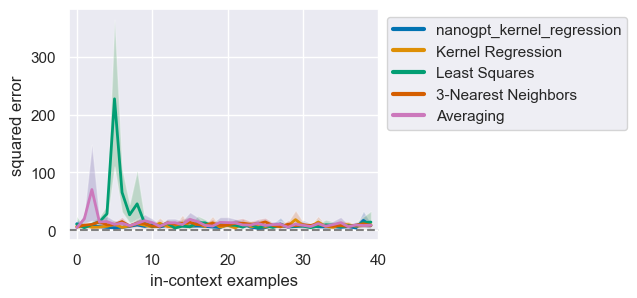

In [19]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task + "_" + run_id]
basic_plot(metrics["standard"], models=models)
plt.show()

mamba_toy mamba


100%|██████████| 1/1 [00:00<00:00, 1009.70it/s]

metrics:  {'standard': {'mamba_embd=128_layer=4_dstate=16_expand=2_dconv=4': {'mean': [2.0185751914978027, 1.0946720838546753, 2.233698606491089, 2.077008008956909, 1.9688293933868408, 2.5469865798950195, 1.2793573141098022, 1.292335867881775, 1.4640817642211914, 2.5739471912384033, 2.3786354064941406, 1.1903060674667358, 1.9310472011566162, 1.248030662536621, 1.9598606824874878, 2.3186473846435547, 1.3726052045822144, 1.8815494775772095, 1.1116584539413452, 1.3322874307632446, 1.285851001739502, 0.8775075078010559, 2.4043147563934326, 2.1360459327697754, 1.2684723138809204, 1.3870677947998047, 1.3808501958847046, 2.092913866043091, 2.472330331802368, 1.7729440927505493, 1.124618411064148, 1.2226800918579102, 1.21086585521698, 1.8820387125015259, 2.082998514175415, 2.3139419555664062, 2.5405824184417725, 1.1259363889694214, 1.3201825618743896, 1.7170326709747314], 'std': [2.8900692462921143, 1.8433969020843506, 3.2383313179016113, 7.387612342834473, 2.552105188369751, 10.07365512847900

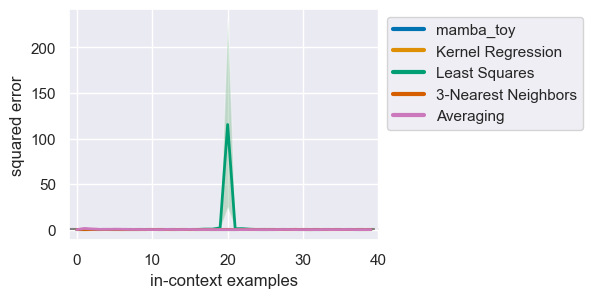

In [24]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task + "_" + run_id]
basic_plot(metrics["standard"], models=models)
plt.show()